In [1]:
#author: Rene Lisasi
#Fraud Detection NN
#Machine Learning
#feedforward with 1 hidden layer with relu activation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer() 
list(data.target_names)
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [27]:
import pandas as pd

def get_data(filename):
    df = pd.read_csv(filename)
    x = np.array(df.iloc[:,:9].values)
    y = np.array(df.iloc[:,9].values)
    dataset = np.column_stack((x, y))
    #np.random.shuffle(dataset)
    # Split data
    train_size = int(0.8 * len(dataset))
    train_dataset, test_dataset = dataset[:train_size], dataset[train_size:]

    train_target=train_dataset[:,9]
    test_target=test_dataset[:,9]

    train_dataset=np.delete(train_dataset,9,axis=1)
    test_dataset=np.delete(test_dataset,9,axis=1)

    return train_dataset, test_dataset, train_target, test_target

#output get_data
train_sample,test_sample,train_target,test_target=get_data('fraud.csv')

In [42]:
print(train_sample[1,8])
# for (data, target) in train_sample:
#     print('data:', data.size(), 'type:', data.type())
#     print('target:', target.size(), 'type:', target.type())
#     break

0.0


In [32]:
from math import ceil
def data_iter(batch_size, X, y):
    x_batch=np.array_split(X, ceil(len(X) / batch_size))
    y_batch=np.array_split(y, ceil(len(y) / batch_size))
    return x_batch,y_batch

#sample data
for sample_iter in zip(*data_iter(700, train_sample,train_target)):
    break
print(sample_iter[0].shape)

(700, 9)


In [43]:
#execute data iter
batch_size=32
train_batch,train_target_batch=data_iter(batch_size,train_sample,train_target)
test_batch,test_target_batch=data_iter(batch_size,train_sample,test_target)

# #output data_iter
# for (data, target) in x_batch:
#     print('data:', data.size(), 'type:', data.type())
#     print('target:', target.size(), 'type:', target.type())
#     print('target:',target)
#     break

In [44]:
#parameters
neurons=train_sample.shape[1]+1
print(neurons)
hidden_neurons=4 #round((np.sqrt(neurons)))
alpha=0.05
output_neurons=2
print(output_neurons)

10
2


In [45]:
import json

class Perceptron:
    #neural net architecture
    def __init__(self,neurons,hidden_neurons):
        self.w1 =np.random.uniform(-1, 1, size=(neurons,hidden_neurons))
        self.w2 =np.random.uniform(-1, 1, size=(1,hidden_neurons))

        self.x=None
        self.h1=None


    # this method will save the weights of the model into a python file
    def saveWeights(self):

        # this is a data type that stores key pair values so it stores w1 with the w1 weights
        save = {
            "w1": self.w1,
            "w2": self.w2
        }

        # opens the json file in write mode and closes it when finished
        with open("save.json", "w") as f:
            # stores save in the json file
            json.dump(save, f)


    # this method will load the weights of the model into the code
    def loadWeights(self):
        # opens the json file in read mode and closes it when finished
        with open("save.json", "r") as f:
            # loads what is stored in the json file into the save
            save = json.load(f)
            # set the weights stored in save
            self.w1 = save["w1"]
            self.w2 = save["w2"]


    #forward computation
    def layer(self,x):
        self.x=x
        self.h1=np.dot(x,self.w1)#linear combination
        # return x
    
    def hidden_layer(self):
        out=np.dot(self.h1,self.w2.T)
        return out
    
    #activation functions:
    #relu
    def relu(self,x):
        x=np.maximum(0,x)
        return x
        
    #logistic
    def sigmoid(self,x):
        x=1/(1 + np.exp(-x))
        return x

    #forward
    def forward(self,x):
        self.layer(x)#set self.x
        self.h1=self.relu(self.h1)
        out=self.hidden_layer()#set self.h1
        return self.sigmoid(out) 

model=Perceptron(neurons,hidden_neurons)
print(model.w1)

[[-0.88203406 -0.243706    0.89271543  0.09151518]
 [-0.93495501 -0.82851602 -0.29871805  0.1748123 ]
 [-0.38479192 -0.66280846  0.34581554  0.0310615 ]
 [-0.34803167 -0.59460295  0.89635215  0.53556135]
 [-0.1067503  -0.20319733  0.67234373 -0.15514536]
 [ 0.4372911   0.25527301 -0.54794528 -0.45227278]
 [ 0.08192554 -0.93347118 -0.59533029 -0.62305051]
 [ 0.87087139  0.03529916 -0.12883906  0.74846412]
 [ 0.51609175 -0.57193768 -0.70496695  0.612931  ]
 [-0.25997171 -0.22416504  0.41174171  0.17042226]]


In [46]:
#loss function
def criterion(pred,target,n):
    loss=(-1/n)*np.sum(((target*np.log(pred))+((1-target)*np.log(1-pred))))
    return loss

In [47]:
def classify(prob):
    if prob>0.5:
            return 1
    else:
        return 0

In [48]:
def correct(pred,target):
    if pred==target:
            return 1
    else:
        return 0

In [105]:
# #split the data
# split=0.7
# dist=round(len(data.data)*split)

# #normalize the data
# norm=np.linalg.norm(data.data)
# beta=np.divide(data.data,norm)

# #commit the split
# training_data=beta[:dist]
# test_data=beta[dist:]
# #split the targets
# training_target=data.target[:dist]
# test_target=data.target[dist:]

In [49]:
#optimization function
def optimize_w2(x,y,pred,w,alpha):
    #compute log loss derivative in terms of dw
    difference=np.subtract(pred,y)
    difference = difference.reshape(1, 1)
    prod = np.dot(difference,x.reshape(1, -1))
    #backpropagation
    dl_dsig=prod
    dsig_dh=np.dot(pred,np.subtract(1,pred))
    dh_drelu=np.where(x>0,1,0)
    dh_dw=x
    gradient=dl_dsig*dsig_dh*dh_dw*dh_drelu
    #gradient descent
    dot=np.dot(alpha,gradient)
    w=np.subtract(w,dot)
    return w

#optimization function
def optimize_w1(x,y,pred,w,alpha):
    #compute log loss derivative in terms of dw
    difference=np.subtract(pred,y)
    difference = difference.reshape(1, 1)
    prod = np.dot(difference,x.reshape(1, -1))
    #backpropagation
    dl_dsig=prod
    dsig_dh=np.dot(pred,np.subtract(1,pred))
    
    dh_dw=x
    gradient=dl_dsig*dsig_dh*dh_dw
    #gradient descent
    dot=np.dot(alpha,gradient).reshape(-1, 1) 
    w=np.subtract(w,dot)
    return w

In [50]:
#train method
def train(epochs,model,batch,targets,alpha):
    losses=[]
    for e in range(epochs):
        loss=0.0
        for data,target in zip(batch,targets):
            n=len(batch)
            data=np.insert(data,0,1,axis=0)#add bias term
            output=model.forward(data)#forward
            loss+=criterion(output,target,n)#calulate loss
            model.w2=optimize_w2(model.h1,target,output,model.w2,alpha)#optimize w2
            model.w1=optimize_w1(model.x,target,output,model.w1,alpha)#optimize w1
        losses.append(loss/len(batch))
    return losses
            

In [51]:
#train
epochs=2000
batch=train_sample
target=train_target
model=model
alpha=0.05
losses=train(epochs,model,batch,target,alpha)
print(losses)

TypeError: can't multiply sequence by non-int of type 'float'

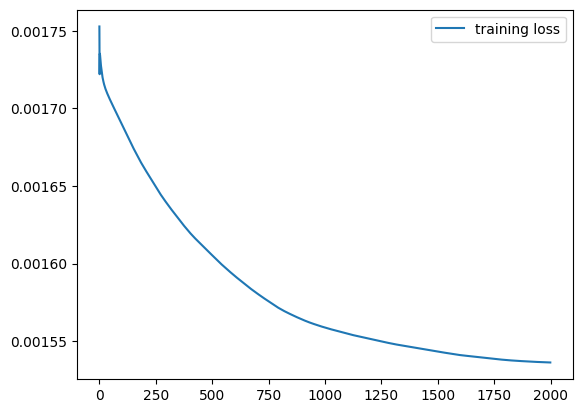

In [127]:
def chart(x_plane,loss_type):
    plt.figure()
    plt.plot([m for m in range(len(x_plane))],x_plane, label=loss_type)
    plt.legend()
    plt.show()

#plot training loss
chart(losses,'training loss')

In [110]:
def test(model,batch,targets):
    losses=[]
    corrects=[]
    for data,target in zip(batch,targets):
        n=len(batch)
        data=np.insert(data,0,1,axis=0)#add bias term
        output=model.forward(data)
        loss=criterion(output,target,n)
        pred=classify(output)
        cor=correct(pred,target)
        corrects.append(cor)
        losses.append(loss)
    accuracy=sum(corrects)/len(batch)
    accuracy=f'{round(accuracy*100,2)}%'
    return losses,accuracy

In [128]:
#test
batch=test_batch
target=test_target
model=model
test_loss,accuracy=test(model,batch,target)
print('test accuracy: ',accuracy)

test accuracy:  93.57%


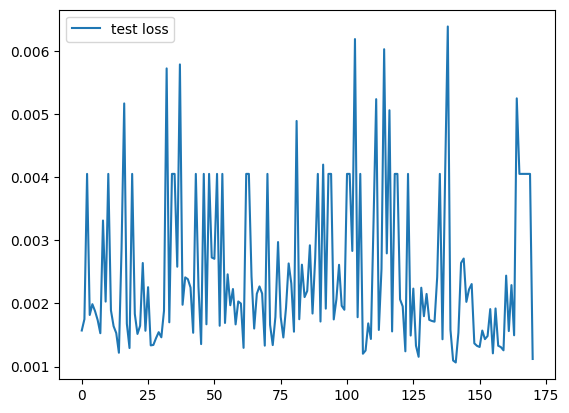

In [55]:
#plot test results
chart(test_loss,'test loss')